In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import sys
sys.path.insert(1, '/global/homes/j/joeschm/IFS_scripts')
from genetools import Parameters

sys.path.insert(0, '/global/homes/j/joeschm/Notebooks/omega_reading')
import om_kHz_DF_V2 as om

In [6]:
def flux_df_builder(filepath):

    flux_df = pd.DataFrame(columns=[])

    os.chdir(filepath)                   #enter into scanfile directory      

    for filename in os.listdir(os.getcwd()):

        if filename.startswith("omega_") and (os.stat(filename).st_size != 0): #check parameter (only for scans) if it's not empty
            #print(filename)
            pars, suffix = om.get_pars(filename) #get pars file and suffix
            ky_min, n0_global, gamma, omega, gamma_kHz, omega_kHz = om.split_omega_data(suffix, pars)  #read the omega file


            df_data = [filepath[-13:], suffix, ky_min, n0_global, gamma, gamma_kHz, omega, omega_kHz]
            omega_col = ['path','suffix', 'ky_min', 'n0_global','gamma(cs/a)','gamma(kHz)', 'omega(cs/a)', 'omega(kHz)']

            flux_scan = pd.DataFrame([df_data], columns = omega_col)
            flux_df = flux_df.append(flux_scan)

    flux_df = flux_df.sort_values(by=['suffix'])   #sort dataframe by increasing ky_min values
    
    return flux_df

In [62]:
filepath = '/global/cscratch1/sd/joeschm/ND_scans/scanfiles0009'
filepath_2x = '/global/cscratch1/sd/joeschm/ND_scans/scanfiles0011'

ND_scan = flux_df_builder(filepath)
ND_scan_2x = flux_df_builder(filepath_2x)

commondf=pd.merge(ND_scan, ND_scan_2x, on=['suffix', 'ky_min', 'n0_global'], right_index=True)

commondf['omega_ratio'] = commondf['omega(kHz)_x']/commondf['omega(kHz)_y'] #regular scan/2x resolution scan
commondf['gamma_ratio'] = commondf['gamma(kHz)_x']/commondf['gamma(kHz)_y'] #regular scan/2x resolution scan

#print(commondf)

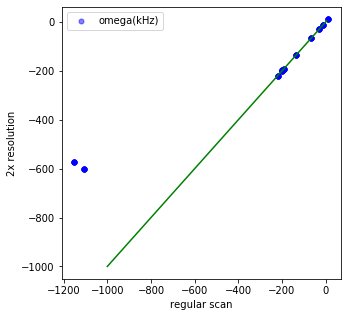

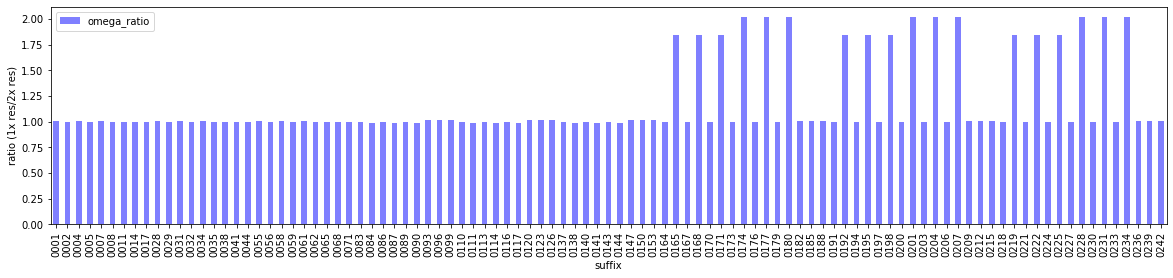

In [60]:
commondf.plot(x ='omega(cs/a)_x', y='omega(cs/a)_y', kind = 'scatter', color = 'blue', label ='omega(kHz)',  alpha = 0.5, marker = '.', s=100, figsize=(5,5))

x = np.linspace(-1000,5,100)
plt.plot(x, x, 'g')

plt.xlabel ('regular scan')
plt.ylabel ('2x resolution')
plt.show()


ax = commondf.plot(x ='suffix', y='omega_ratio', kind = 'bar', color = 'blue',  alpha = 0.5, figsize=(20,4))
plt.xlabel ('suffix')
plt.ylabel ('ratio (1x res/2x res)')
#ax.axes.set_aspect('auto')
plt.show()

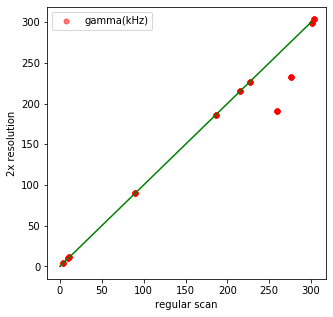

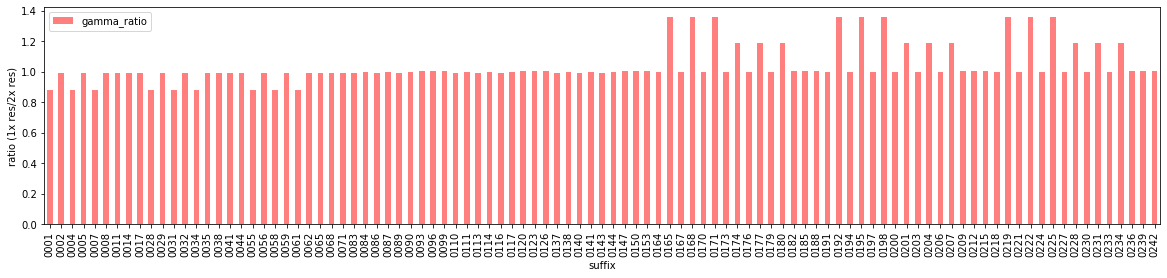

In [61]:
commondf.plot(x ='gamma(cs/a)_x', y='gamma(cs/a)_y', kind = 'scatter', color = 'red', label = 'gamma(kHz)', alpha = 0.5, marker = '.', s=100, figsize=(5,5))

x = np.linspace(0,300,100)
plt.plot(x, x, 'g')

plt.xlabel ('regular scan')
plt.ylabel ('2x resolution')
plt.show()


ax = commondf.plot(x ='suffix', y='gamma_ratio', kind = 'bar', color = 'red',  alpha = 0.5, figsize=(20,4))
plt.xlabel ('suffix')
plt.ylabel ('ratio (1x res/2x res)')
#ax.axes.set_aspect('auto')
plt.show()